# Análisis exploratorio de datos - Práctica

Para poner en práctica lo que vayamos aprendiendo sobre EDA, vamos a trabajar con un conjunto de datos que contiene información sobre los 801 Pokémon de las siete primeras generaciones. La información contenida en este conjunto de datos incluye estadísticas básicas, rendimiento frente a otros tipos, altura, peso, clase a la que pertenecen, puntos de experiencia, habilidades, etc.

<center><img src="img/pokeball.png" alt="" title="Pokeball" width="150" /></center>

Pero, ¿qué es lo que hace a un Pokémon ser legendario? Consultando [The Bulbapedia Wiki](https://bulbapedia.bulbagarden.net/wiki/Legendary_Pokémon), los Pokémon legendarios

> _...son un grupo de Pokémon increíblemente raros y, a menudo, muy poderosos, que generalmente ocupan un lugar destacado en las leyendas y los mitos del mundo Pokémon... No hay criterios explícitos que definan qué hace que un Pokémon sea un Pokémon legendario. En cambio, la única forma de identificar a un Pokémon como perteneciente a este grupo es a través de declaraciones de medios oficiales, como los juegos o el anime._

Aunque por lo que parece no existen criterios explícitos sobre lo que define a un Pokémon como legendario, vamos a comprobar si usando las estadísticas de cada Pokémon podemos encontrar un modelo de clasificación que nos permita predecir si un Pokémon es o no legendario.

## 1. Generar la pregunta de investigación

**Pregunta:** _¿Podemos, a partir de cierta información sobre los Pokémon, clasificar los Pokémon en legendarios y no legendarios?_

## 2. Obtener los datos

La información para crear este conjunto de datos, el cual puede descargarse en Kaggle de [The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon?select=pokemon.csv), se extrajo de http://serebii.net/ mediante _web scraping_.

Este conjunto de datos contiene 41 columnas o variables, siendo su interpretación la siguiente:
* `name` - El nombre en inglés del Pokémon.
* `japanese_name` - El nombre japonés original del Pokémon.
* `pokedex_number` - El número de entrada del Pokémon en el Pokédex Nacional.
* `percent_male` - El porcentaje de la especie que son machos. En blanco si el Pokémon no tiene género.
* `type1` - El tipo primario del Pokémon.
* `type2` - El tipo secundario del Pokémon.
* `classification` - La clasificación de los Pokémon como se describe en el Pokédex Sol y Luna.
* `height_m` - Altura del Pokémon en metros.
* `weight_kg` - Peso del Pokémon en kilogramos.
* `capture_rate` - Tasa de captura del Pokémon.
* `base_egg_steps` - El número de pasos necesarios para eclosionar un huevo del Pokémon.
* `abilities` - Una lista ordenada de habilidades que el Pokémon puede tener.
* `experience_growth` - La experiencia de crecimiento de los Pokémon.
* `base_happiness` - Felicidad de base del Pokémon.
* `against_?` - Dieciocho características que denotan la cantidad de daño recibido contra un ataque de un tipo particular.
* `hp` - El _hit point_ de base del Pokémon. Es una estadística que determina cuánto daño puede recibir un Pokémon antes de desmayarse.
* `attack` - El ataque base del Pokémon.
* `defense` - La defensa base del Pokémon.
* `sp_attack` - El ataque especial base del Pokémon.
* `sp_defense` - La defensa especial base del Pokémon.
* `speed` - La velocidad base del Pokémon.
* `base_total` - Suma de `hp`, `attack`, `defense`, `sp_attack`, `sp_defense` y `speed`.
* `generation` - La generación en la que se introdujo por primera vez el Pokémon.
* `is_legendary` - Indica si el Pokémon es o no legendario y es la etiqueta que vamos a tratar de predecir.

## 3. EDA
### Importar librerías

In [16]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

### Importar los datos

**Carga los datos en un DataFrame de Pandas llamado `data`.**

In [17]:
data = pd.read_csv(r'C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\datos_precios_casas.csv', sep=';')

**Muestra las 5 primeras filas.**

In [18]:
data.head()

district        neighborhood  rooms  area_m2 lift eurometro  prices  \
0      Gràcia             el Coll      3      252   No     912,7  230000   
1  Nou Barris      la Prosperitat      2       53   No    924,53   49000   
2  Nou Barris         Can Peguera      3      160   No     937,5  150000   
3  Nou Barris              Verdun      4      130   No      1000  130000   
4    Eixample  la Sagrada Família      4      350   No   1114,29  390000   

   compra  
0       0  
1       0  
2       0  
3       0  
4       0

**Muestra las 10 últimas filas.**

In [19]:
data.tail(10)

district                                  neighborhood  rooms  \
3255  Sant Martí                                   el Poblenou      2   
3256    Eixample                        la Dreta de l'Eixample      2   
3257    Eixample                        la Dreta de l'Eixample      3   
3258    Eixample               l'Antiga Esquerra de l'Eixample      4   
3259  Sant Martí  Diagonal Mar i el Front Marítim del Poblenou      4   
3260  Sant Martí  Diagonal Mar i el Front Marítim del Poblenou      4   
3261    Eixample                        la Dreta de l'Eixample      2   
3262    Eixample               l'Antiga Esquerra de l'Eixample      3   
3263    Eixample                        la Dreta de l'Eixample      3   
3264    Eixample                        la Dreta de l'Eixample      4   

      area_m2 lift eurometro    prices  compra  
3255      134  Yes   14179,1   1900000       0  
3256      150  Yes  14386,67   2158000       0  
3257      114  Yes  14473,68   1650000       0  
3258      204  Yes  14583,33   2975000       0  
3259      130  Yes     15000   1950000       0  
3260      132  Yes     15000   1980000       0  
3261      145  Yes  15089,66   2188000       0  
3262       90  Yes  15888,89   1430000       0  
3263      140  Yes  17857,14   2500000       0  
3264      600  Yes     20000  12000000       0

### Análisis descriptivo de las variables

**Imprime la información básica del dataset.**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      3265 non-null   object
 1   neighborhood  3265 non-null   object
 2   rooms         3265 non-null   int64 
 3   area_m2       3265 non-null   int64 
 4   lift          3265 non-null   object
 5   eurometro     3265 non-null   object
 6   prices        3265 non-null   int64 
 7   compra        3265 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 204.2+ KB


**Muestra el número de filas/registros y columnas/variables del dataset.**

In [21]:
print(f'Tenemos {data.shape[0]} registros y {data.shape[1]} variables.')

Tenemos 3265 registros y 8 variables.


**Muestra el resumen estadístico de las variables numéricas del conjunto de datos.**

In [22]:
data.describe()

rooms      area_m2        prices       compra
count  3265.000000  3265.000000  3.265000e+03  3265.000000
mean      3.160796   121.566616  6.004200e+05     0.086677
std       1.325257    92.721515  6.522661e+05     0.281404
min       1.000000    20.000000  4.900000e+04     0.000000
25%       2.000000    72.000000  2.799000e+05     0.000000
50%       3.000000    93.000000  4.190000e+05     0.000000
75%       4.000000   135.000000  6.550000e+05     0.000000
max      13.000000   900.000000  1.200000e+07     1.000000

Más información sobre esta función en [Pandas Describe, Explained](https://www.sharpsightlabs.com/blog/pandas-describe/).

**Muestra el resumen estadístico de las variables de tipo `Object` del conjunto de datos. ¿Notas algo raro?**

In [23]:
data.describe(include=['O'])

district            neighborhood  lift eurometro
count       3265                    3265  3265      3265
unique        10                      65     2      2376
top     Eixample  la Dreta de l'Eixample   Yes      5000
freq         788                     241  2727        32

_Incluye aquí tus observaciones._

**Identifica y analiza la variable de salida. ¿Cuál es la variable de salida, es decir, cuál es la que vamos a tratar de predecir?**

In [24]:
# Hacemos un recuento de la variable de salida
print(data.columns)

# Asegurarse de que 'compra' esté en la lista de nombres de columnas
if 'compra' in data.columns:
    counts = data['compra'].value_counts(dropna=False)
    print(counts)
else:
    print("La columna 'compra' no existe en el DataFrame.")

Index(['district', 'neighborhood', 'rooms', 'area_m2', 'lift', 'eurometro',
       'prices', 'compra'],
      dtype='object')
0    2982
1     283
Name: compra, dtype: int64


**¿Nos falta este dato para alguno de los registros? ¿En caso de faltar qué implicaría esto?**

_Incluye aquí tus observaciones._

**¿Cómo interpretas esos valores?**

_Incluye aquí tus observaciones._

**¿Está balanceado el conjunto de datos?**

_Incluye aquí tus observaciones._

Más información sobre conjuntos de datos desbalanceados: [Imbalanced Data](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

**Crea un _count plot_ que muestre la proporción de Pokémons legendarios frente a los no legendarios.**

Un _count plot_ es un gráfico de barras que nos muestra el número de ocurrencias o la frecuencia de clase de una variable categórica.

In [25]:
sns.set_style('white')

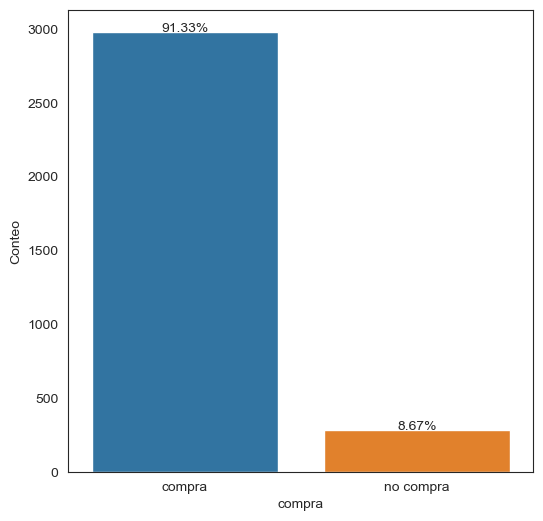

In [26]:
# Crea el count plot
fig = plt.figure(figsize=(6, 6))
ax = sns.countplot(x='compra', data=data)
ax.set_ylabel('Conteo')
ax.set_xticklabels(['compra', 'no compra'])

# Muestra los porcentajes en el gráfico
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format(height / len(data) * 100),
            ha='center')


Para representar las variables categóricas siempre es mejor usar un diagrama de barras o un _count plot_ que un _pie chart_ por que estos últimos pueden ser engañosos. Más información: [Don’t Trust Pie Charts](https://appsilon.com/dont-trust-pie-charts/).

### Valores ausentes

**Comprueba qué variables tienen valores ausentes y cuántos. Muestra solo las variables que tienen valores ausentes.**

In [27]:
# Calculamos el número de valores ausentes
null_series = data.isnull().sum()

# Filtramos por las variables que tienen valores ausentes
null_series[null_series > 0]


Series([], dtype: int64)

### Duplicados

**Comprueba si hay valores duplicados. ¿Crees que podemos eliminarlos sin más?**

In [33]:
data[data.duplicated(keep=False)]


district            neighborhood  rooms  area_m2 lift  \
19             Nou Barris        la Trinitat Nova      2       76   No   
20             Nou Barris        la Trinitat Nova      2       76   No   
34             Nou Barris          la Prosperitat      3       77   No   
35             Nou Barris          la Prosperitat      3       77   No   
45             Sant Martí   el Besòs i el Maresme      2       52   No   
...                   ...                     ...    ...      ...  ...   
3191             Eixample  la Dreta de l'Eixample      3      153  Yes   
3194             Eixample  la Dreta de l'Eixample      3      146  Yes   
3195             Eixample  la Dreta de l'Eixample      3      146  Yes   
3235  Sarrià-Sant Gervasi         les Tres Torres      3      200  Yes   
3236  Sarrià-Sant Gervasi         les Tres Torres      3      200  Yes   

     eurometro   prices  compra  
19     1644,74   125000       0  
20     1644,74   125000       0  
34     1816,88   139900       0  
35     1816,88   139900       0  
45     1903,85    99000       0  
...        ...      ...     ...  
3191   9771,24  1495000       0  
3194   9794,52  1430000       0  
3195   9794,52  1430000       0  
3235     11800  2360000       0  
3236     11800  2360000       0  

[293 rows x 8 columns]

_Incluye aquí tus observaciones._

In [35]:
print(f"Tenemos {data.shape[0]} registros y esperaríamos encontrar {data['prices'].nunique()} opciones de pisos para comprar.")
print(f"Parece que tenemos {data.shape[0] - data['prices'].nunique()} registros repetidos.")

Tenemos 3265 registros y esperaríamos encontrar 717 opciones de pisos para comprar.
Parece que tenemos 2548 registros repetidos.


In [37]:
import pandas as pd

# Leer el DataFrame desde un archivo CSV u otra fuente de datos
data = pd.read_csv(r'C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\datos_precios_casas.csv', sep=';')

# Verificar si hay filas duplicadas
duplicates = data.duplicated()

# Contar el número de filas duplicadas
num_duplicates = duplicates.sum()

# Mostrar las filas duplicadas
duplicated_rows = data[duplicates]

# Imprimir resultados
print("Número de filas duplicadas:", num_duplicates)
print("Filas duplicadas:")
print(duplicated_rows)

# Exportar el DataFrame a un archivo CSV sin las filas duplicadas
data_unique = data.drop_duplicates()
data_unique.to_csv('datos_precios_casas_sin_duplicados.csv', index=False)

Número de filas duplicadas: 151
Filas duplicadas:
                 district                         neighborhood  rooms  \
20             Nou Barris                     la Trinitat Nova      2   
35             Nou Barris                       la Prosperitat      3   
46             Sant Martí                el Besòs i el Maresme      2   
72             Sant Martí                  la Verneda i la Pau      3   
112        Sants-Montjuïc  el Poble Sec - AEI Parc de Montjuïc      3   
...                   ...                                  ...    ...   
3102         Ciutat Vella                       el Barri Gòtic      2   
3131            Les Corts                            les Corts      2   
3191             Eixample               la Dreta de l'Eixample      3   
3195             Eixample               la Dreta de l'Eixample      3   
3236  Sarrià-Sant Gervasi                      les Tres Torres      3   

      area_m2 lift eurometro   prices  compra  
20         76   No   1644

_Incluye aquí tus observaciones._

In [38]:
# Elimina los valores duplicados
data = data.drop_duplicates()

# Resetea el índice
data = data.reset_index(drop=True)

# Muestra las dimensiones del dataset
data.shape


(3114, 8)

### Ajuste de los tipos de variables

**Como hemos comentado, la variable `capture_rate` parece que debería ser numérica pero vemos que es de tipo `Object`, necesitamos saber qué ocurre. Muestra los posibles valores que puede tomar esta variable.**

In [42]:
data['eurometro'].unique()

array(['912,7', '924,53', '937,5', ..., '15888,89', '17857,14', '20000'],
      dtype=object)

**Parece que hay algún Pokémon que tiene 2 valores para esta variable. Localiza qué Pokémon son, es decir, cómo se llaman.**

In [44]:
data['district']

0           Gràcia
1       Nou Barris
2       Nou Barris
3       Nou Barris
4         Eixample
           ...    
3109    Sant Martí
3110      Eixample
3111      Eixample
3112      Eixample
3113      Eixample
Name: district, Length: 3114, dtype: object

**Ahora que hemos localizado el Pokémon que está dando problemas, sustituye su `capture_rate` por el valor 30 y transforma esta columna en una de tipo numérico.**

In [45]:
# Cambiamos el capture_rate por '30'
type(data.loc[0, 'district'])

str

In [50]:
from ast import literal_eval

# Aplicar literal_eval() a cada valor de las columnas del DataFrame
for col in data.columns:
    try:
        data[col] = data[col].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)
    except (SyntaxError, ValueError):
        pass
print(data)

        district                                  neighborhood  rooms  \
0         Gràcia                                       el Coll      3   
1     Nou Barris                                la Prosperitat      2   
2     Nou Barris                                   Can Peguera      3   
3     Nou Barris                                        Verdun      4   
4       Eixample                            la Sagrada Família      4   
...          ...                                           ...    ...   
3109  Sant Martí  Diagonal Mar i el Front Marítim del Poblenou      4   
3110    Eixample                        la Dreta de l'Eixample      2   
3111    Eixample               l'Antiga Esquerra de l'Eixample      3   
3112    Eixample                        la Dreta de l'Eixample      3   
3113    Eixample                        la Dreta de l'Eixample      4   

      area_m2 lift eurometro    prices  compra  
0         252   No     912,7    230000       0  
1          53   No    924

In [52]:
data = data.applymap(lambda x: [x] if pd.notnull(x) else [])
print(data)

            district                                      neighborhood  rooms  \
0         [[Gràcia]]                                       [[el Coll]]  [[3]]   
1     [[Nou Barris]]                                [[la Prosperitat]]  [[2]]   
2     [[Nou Barris]]                                   [[Can Peguera]]  [[3]]   
3     [[Nou Barris]]                                        [[Verdun]]  [[4]]   
4       [[Eixample]]                            [[la Sagrada Família]]  [[4]]   
...              ...                                               ...    ...   
3109  [[Sant Martí]]  [[Diagonal Mar i el Front Marítim del Poblenou]]  [[4]]   
3110    [[Eixample]]                        [[la Dreta de l'Eixample]]  [[2]]   
3111    [[Eixample]]               [[l'Antiga Esquerra de l'Eixample]]  [[3]]   
3112    [[Eixample]]                        [[la Dreta de l'Eixample]]  [[3]]   
3113    [[Eixample]]                        [[la Dreta de l'Eixample]]  [[4]]   

      area_m2     lift     

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Desenrollar la columna lift
data_expanded = data.explode('lift')

# Scatter plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=data_expanded, x='prices', y='rooms', hue='lift')

# Configuración de ejes y leyenda
ax.set_xlabel('Precios')
ax.set_ylabel('Número de habitaciones')
ax.legend(title='Lift')

# Mostrar el gráfico
plt.show()


TypeError: unhashable type: 'list'

<Figure size 1000x600 with 0 Axes>

**Imprime un listado con todas las habilidades posibles que puede tener un Pokémon y cuéntalas. Investiga la función `eval()` para devolver el tipo `list()` a los valores de las celdas de esta variable que ahora mismo están en formato cadena de texto.**

In [86]:
# Mostramos el contenido de la columna 'abilities'


0      ['Overgrow', 'Chlorophyll']
1      ['Overgrow', 'Chlorophyll']
2      ['Overgrow', 'Chlorophyll']
3         ['Blaze', 'Solar Power']
4         ['Blaze', 'Solar Power']
                  ...             
796                ['Beast Boost']
797                ['Beast Boost']
798                ['Beast Boost']
799                ['Prism Armor']
800                 ['Soul-Heart']
Name: abilities, Length: 801, dtype: object

In [87]:
# Comprobamos que el contenido de las celdas es una cadena


str

In [88]:
# Transformamos las cadenas en listas
from ast import literal_eval


Más información sobre las funciones `eval()` y `literal_eval()` en [Python eval(): Evaluate Expressions Dynamically](https://realpython.com/python-eval-function/#general-purpose-expressions).

In [89]:
# Comprobamos que el contenido de las celdas ahora es una lista


list

0      [Overgrow, Chlorophyll]
1      [Overgrow, Chlorophyll]
2      [Overgrow, Chlorophyll]
3         [Blaze, Solar Power]
4         [Blaze, Solar Power]
                ...           
796              [Beast Boost]
797              [Beast Boost]
798              [Beast Boost]
799              [Prism Armor]
800               [Soul-Heart]
Name: abilities, Length: 801, dtype: object

In [91]:
# Creamos un conjunto con todas las habilidades posibles

# Mostramos el conjunto de habilidades

# Hacemos el recuendo de habilidades


{'Klutz', 'Heavy Metal', 'Power Construct', 'Turboblaze', 'Water Veil', 'Cute Charm', 'Super Luck', 'Mummy', 'Suction Cups', 'Pressure', 'Insomnia', 'RKS System', 'Grassy Surge', 'Imposter', 'Normalize', 'Run Away', 'Wonder Skin ', 'Berserk', 'Bulletproof', 'Beast Boost', 'Prankster', 'Grass Pelt', 'Minus', 'Torrent', 'Snow Cloak', 'Reckless', 'Victory Star', 'Magnet Pull', 'Regenerator', 'Effect Spore', 'Frisk', 'Dazzling', 'Analytic', 'Rattled', 'Poison Touch', 'Tangled Feet', 'Iron Fist', 'Moxie', 'Dark Aura', 'Stamina', 'Cheek Pouch', 'Scrappy', 'Fluffy', 'Psychic Surge', 'Guts', 'Big Pecks', 'Forewarn', 'Synchronize', 'Pure Power', 'Fur Coat', 'Zen Mode', 'Air Lock', 'Hustle', 'Cloud Nine', 'Lightningrod', 'Sand Force', 'Anger Point', 'Steadfast', 'Speed Boost', 'Flower Veil', 'Fairy Aura', 'Overgrow', 'Swift Swim', 'Bad Dreams', 'Heatproof', 'Sweet Veil', 'Battle Armor', 'Sand Stream', 'Flower Gift', 'Healer', 'Rough Skin', 'Refrigerate', 'Truant', 'Vital Spirit', 'Color Change',

227

**Crea otra característica que sea más informativa a partir de `abilities` con el número de habilidades de cada Pokémon y nómbrala `n_abilities`.**

In [92]:
# Creamos la nueva variable con el número de habilidades


In [93]:
# Hacemos un recuento para comprobar que ha funcionado


3    427
2    245
1    109
6     13
4      7
Name: n_abilities, dtype: int64

**Muestra un gráfico que relacione el número de habilidades que un Pokémon puede tener con la variable de salida y explica si encuentras algún patrón.**

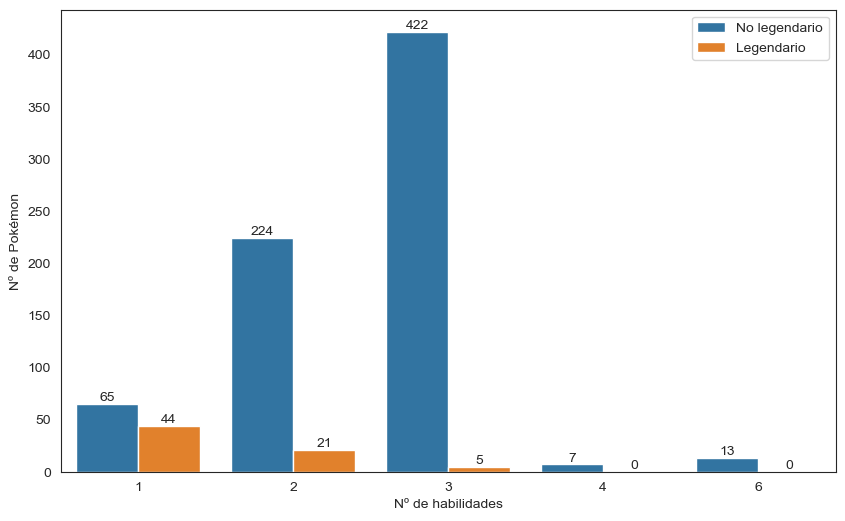

In [95]:
# Creamos el count plot

# Mostramos el número de Pokémons en el gráfico


_Incluye aquí tus observaciones._

### Detección de valores atípicos

**Muestra la descripción de las siguientes variables numéricas:**

In [96]:
cols = ['attack', 'base_egg_steps', 'base_happiness',
        'base_total', 'capture_rate', 'defense',
        'experience_growth', 'hp', 'sp_attack',
        'sp_defense', 'speed']

attack  base_egg_steps  base_happiness  base_total  capture_rate  \
count  801.000000      801.000000      801.000000  801.000000    801.000000   
mean    77.857678     7191.011236       65.362047  428.377029     98.675406   
std     32.158820     6558.220422       19.598948  119.203577     76.248866   
min      5.000000     1280.000000        0.000000  180.000000      3.000000   
25%     55.000000     5120.000000       70.000000  320.000000     45.000000   
50%     75.000000     5120.000000       70.000000  435.000000     60.000000   
75%    100.000000     6400.000000       70.000000  505.000000    170.000000   
max    185.000000    30720.000000      140.000000  780.000000    255.000000   

          defense  experience_growth          hp   sp_attack  sp_defense  \
count  801.000000       8.010000e+02  801.000000  801.000000  801.000000   
mean    73.008739       1.054996e+06   68.958801   71.305868   70.911361   
std     30.769159       1.602558e+05   26.576015   32.353826   27.942501   
min      5.000000       6.000000e+05    1.000000   10.000000   20.000000   
25%     50.000000       1.000000e+06   50.000000   45.000000   50.000000   
50%     70.000000       1.000000e+06   65.000000   65.000000   66.000000   
75%     90.000000       1.059860e+06   80.000000   91.000000   90.000000   
max    230.000000       1.640000e+06  255.000000  194.000000  230.000000   

            speed  
count  801.000000  
mean    66.334582  
std     28.907662  
min      5.000000  
25%     45.000000  
50%     65.000000  
75%     85.000000  
max    180.000000

**¿Te llama algo la atención? Compara la media con la mediana de cada variable.**

_Incluye aquí tus observaciones._

**Vamos a analizar la distribución de estas características, en función de si los Pokémon son o no legendarios, usando una serie de visualizaciones de tipo _box plots_.**

Los _box plots_ o diagramas de caja se usan para mostrar la distribución de las variables numéricas. Se basan en percentiles y brindan una forma rápida de visualizar la distribución de los datos.

Cuando tenemos variables continuas que se dividen en grupos o categorías, podemos usar un diagrama de caja para mostrar la tendencia central y la dispersión de cada grupo así como los outliers en caso de que los haya.

<center><img src="img/v_boxplot.png" alt="" title="Box plot" width="600" /></center>

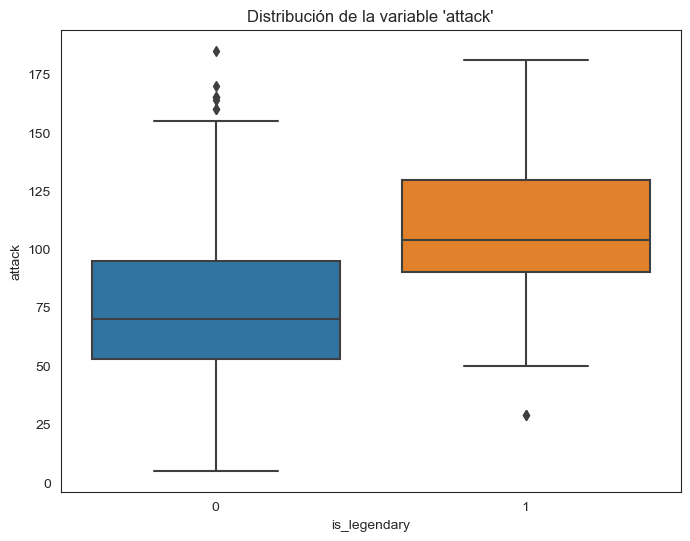

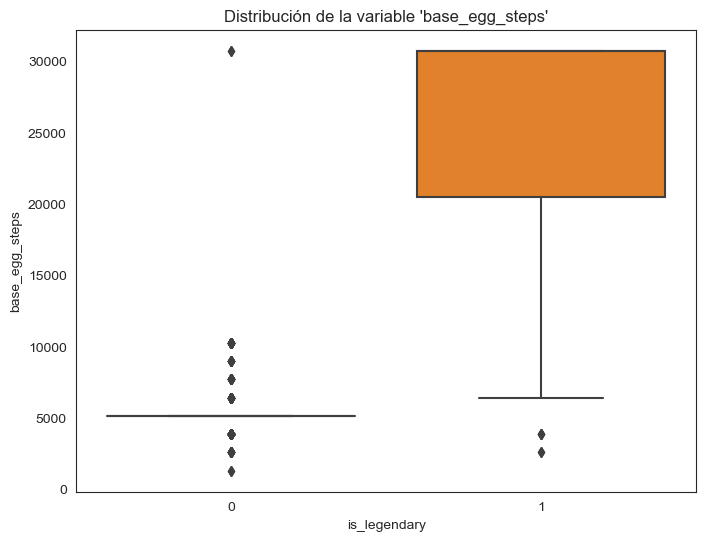

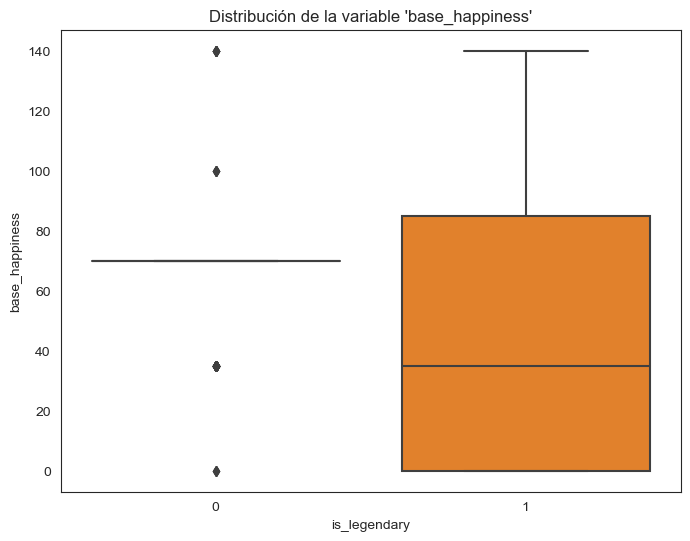

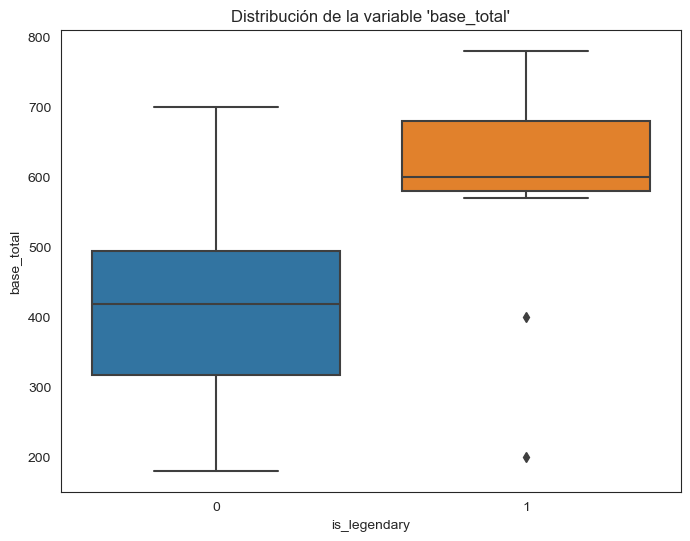

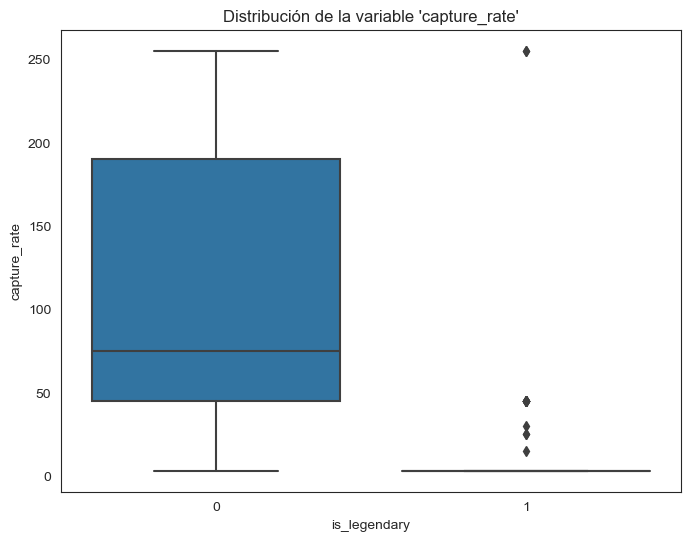

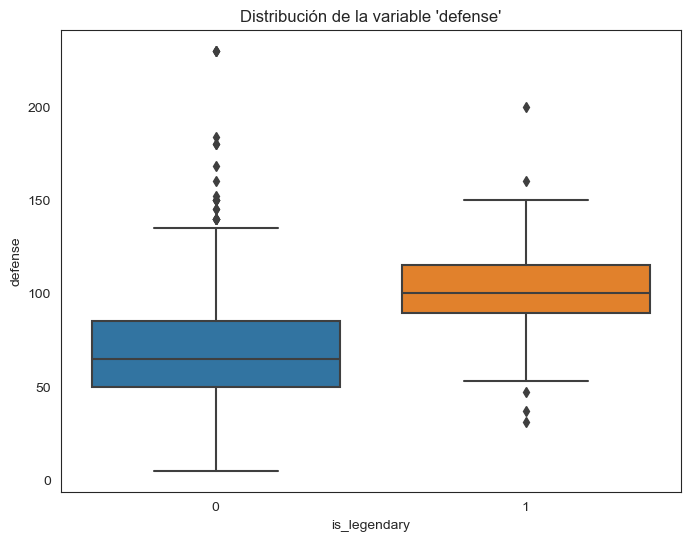

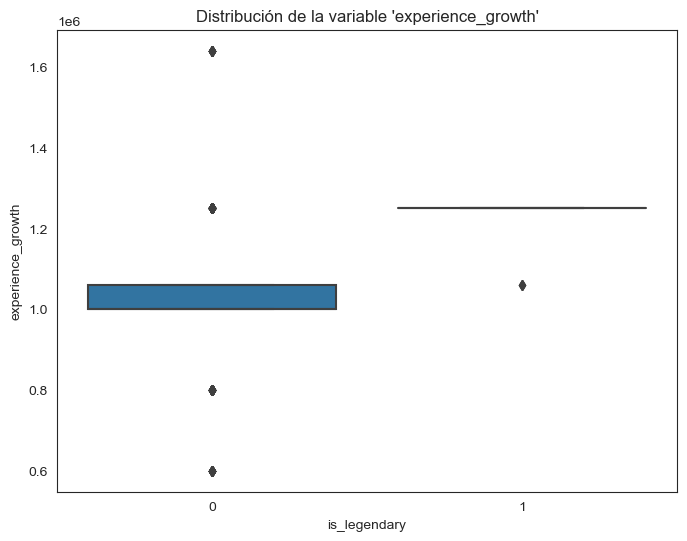

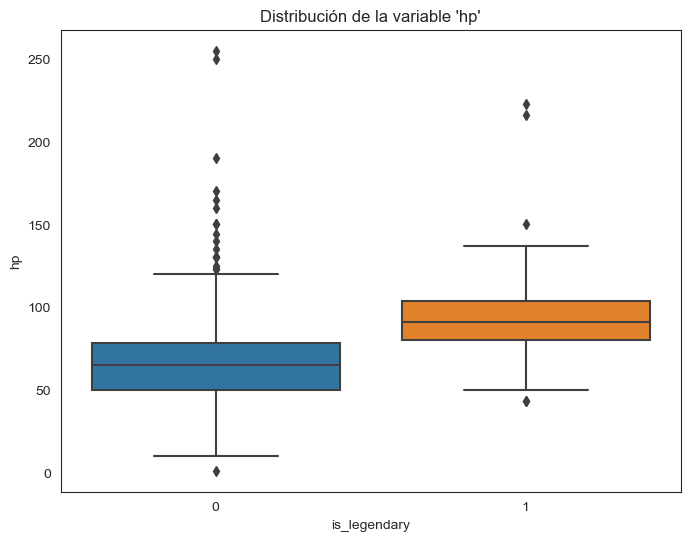

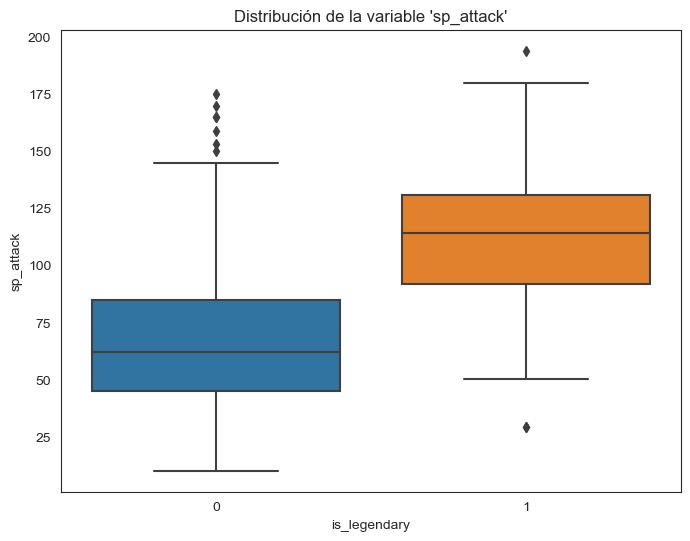

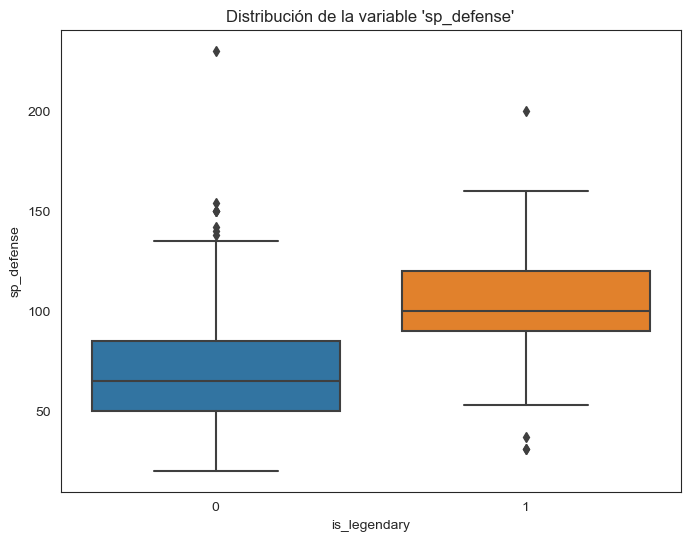

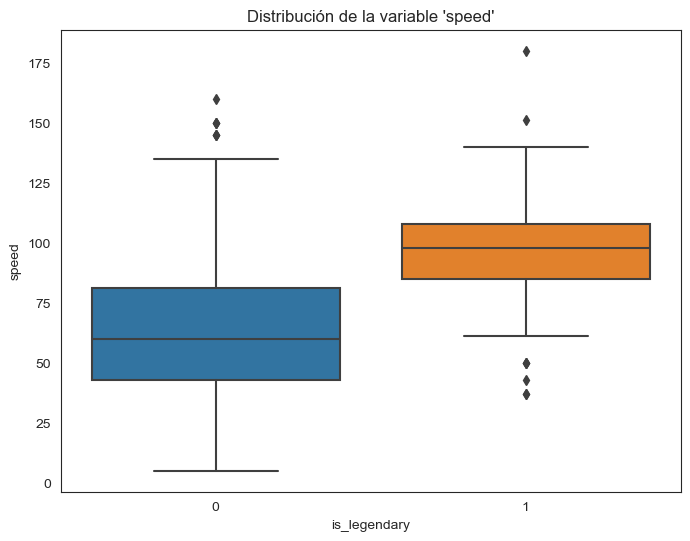

In [98]:
# Generamos los box plots


_Incluye aquí tus observaciones._

**Usando la librería Plotly, muestra en un gráfico de tipo histograma cómo se distribuyen el peso y la altura de los Pokémon. ¿Qué te dice este gráfico sobre la distribución de estas variables?**

Un histograma es un gráfico de barras verticales que representa la distribución de un conjunto de datos de una variable continua. Cada barra en un histograma representa la frecuencia en cada intervalo o contenedor.

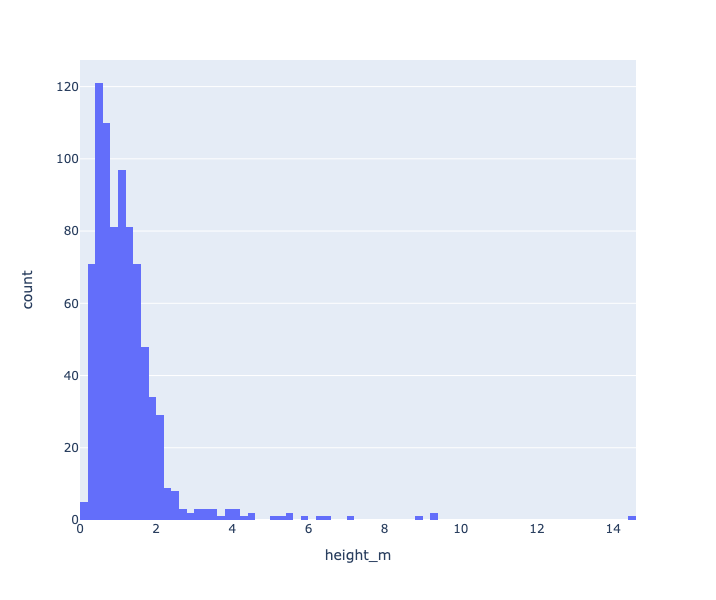

In [99]:
# Distribución altura


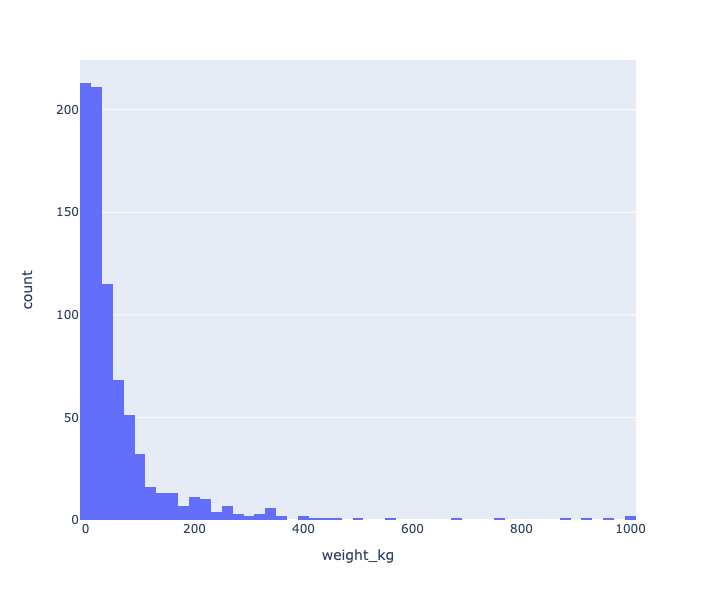

In [100]:
# Distribución peso


_Incluye aquí tus observaciones._

Más información sobre la librería Plotly: [Plotly Open Source Graphing Library for Python](https://plotly.com/python/)

**Con la librería Plotly, crea un _scatter plot_ usando la altura y peso de los Pokémon en el que se diferencie entre legendarios y no legendarios. ¿Qué deduces del gráfico?**

Cuando tienes dos variables continuas, puedes visualizar su relación usando un diagrama de dispersión (_scatter plot_). El eje $𝑥$ representa una variable y el eje $𝑦$ otra, y cada punto del gráfico es un registro.

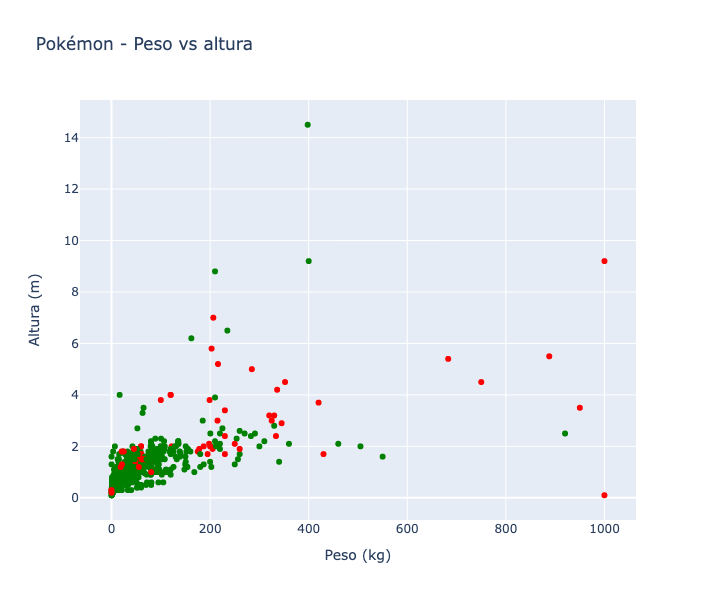

In [102]:
# Generamos el diagrama de dispersión


_Incluye aquí tus observaciones._

**¿Crees que sería aconsejable eliminar los valores atípicos en nuestro conjunto de datos?**

_Incluye aquí tus observaciones._

Para más información sobre la detección y el tratamiento de los valores atípicos:
* [Detect and Remove the Outliers using Python](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)
* [How to Detect Outliers in Machine Learning – 4 Methods for Outlier Detection](https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/)

### Estudio de la correlación

**Comprueba si existe alguna correlación entre los tipos de Pokémon y la variable que queremos predecir. Necesitarás convertir la variable categórica `type` numérica usando `pd.get_dummies()`. Interpreta los resultados.**

In [103]:
# Preparamos las columnas de las que queremos analizar la correlación


bug  bug_electric  bug_fairy  bug_fighting  bug_fire  bug_flying  \
0      0             0          0             0         0           0   
1      0             0          0             0         0           0   
2      0             0          0             0         0           0   
3      0             0          0             0         0           0   
4      0             0          0             0         0           0   
..   ...           ...        ...           ...       ...         ...   
796    0             0          0             0         0           0   
797    0             0          0             0         0           0   
798    0             0          0             0         0           0   
799    0             0          0             0         0           0   
800    0             0          0             0         0           0   

     bug_ghost  bug_grass  bug_ground  bug_poison  ...  water_flying  \
0            0          0           0           0  ...             0   
1            0          0           0           0  ...             0   
2            0          0           0           0  ...             0   
3            0          0           0           0  ...             0   
4            0          0           0           0  ...             0   
..         ...        ...         ...         ...  ...           ...   
796          0          0           0           0  ...             0   
797          0          0           0           0  ...             0   
798          0          0           0           0  ...             0   
799          0          0           0           0  ...             0   
800          0          0           0           0  ...             0   

     water_ghost  water_grass  water_ground  water_ice  water_poison  \
0              0            0             0          0             0   
1              0            0             0          0             0   
2              0            0             0          0             0   
3              0            0             0          0             0   
4              0            0             0          0             0   
..           ...          ...           ...        ...           ...   
796            0            0             0          0             0   
797            0            0             0          0             0   
798            0            0             0          0             0   
799            0            0             0          0             0   
800            0            0             0          0             0   

     water_psychic  water_rock  water_steel  is_legendary  
0                0           0            0             0  
1                0           0            0             0  
2                0           0            0             0  
3                0           0            0             0  
4                0           0            0             0  
..             ...         ...          ...           ...  
796              0           0            0             1  
797              0           0            0             1  
798              0           0            0             1  
799              0           0            0             1  
800              0           0            0             1  

[801 rows x 162 columns]

In [104]:
# Comprueba el tipo para alguno de los Pokémons


'grass_steel'

0

In [108]:
# Calculamos la correlación


bug  bug_electric  bug_fairy  bug_fighting  bug_fire  \
bug            1.000000     -0.010741  -0.007586     -0.009296 -0.007586   
bug_electric  -0.010741      1.000000  -0.003544     -0.004344 -0.003544   
bug_fairy     -0.007586     -0.003544   1.000000     -0.003068 -0.002503   
bug_fighting  -0.009296     -0.004344  -0.003068      1.000000 -0.003068   
bug_fire      -0.007586     -0.003544  -0.002503     -0.003068  1.000000   
...                 ...           ...        ...           ...       ...   
water_poison  -0.009296     -0.004344  -0.003068     -0.003759 -0.003068   
water_psychic -0.012017     -0.005615  -0.003965     -0.004859 -0.003965   
water_rock    -0.010741     -0.005019  -0.003544     -0.004344 -0.003544   
water_steel   -0.005361     -0.002505  -0.001769     -0.002168 -0.001769   
is_legendary  -0.046919     -0.021923  -0.015482      0.125768 -0.015482   

               bug_flying  bug_ghost  bug_grass  bug_ground  bug_poison  ...  \
bug             -0.019474  -0.005361  -0.013172   -0.005361   -0.017891  ...   
bug_electric    -0.009099  -0.002505  -0.006155   -0.002505   -0.008360  ...   
bug_fairy       -0.006426  -0.001769  -0.004346   -0.001769   -0.005904  ...   
bug_fighting    -0.007875  -0.002168  -0.005327   -0.002168   -0.007235  ...   
bug_fire        -0.006426  -0.001769  -0.004346   -0.001769   -0.005904  ...   
...                   ...        ...        ...         ...         ...  ...   
water_poison    -0.007875  -0.002168  -0.005327   -0.002168   -0.007235  ...   
water_psychic   -0.010180  -0.002802  -0.006885   -0.002802   -0.009352  ...   
water_rock      -0.009099  -0.002505  -0.006155   -0.002505   -0.008360  ...   
water_steel     -0.004541  -0.001250  -0.003071   -0.001250   -0.004172  ...   
is_legendary    -0.039747  -0.010941  -0.026883   -0.010941   -0.036515  ...   

               water_flying  water_ghost  water_grass  water_ground  \
bug               -0.014236    -0.007586    -0.009296     -0.016163   
bug_electric      -0.006652    -0.003544    -0.004344     -0.007552   
bug_fairy         -0.004698    -0.002503    -0.003068     -0.005333   
bug_fighting      -0.005757    -0.003068    -0.003759     -0.006536   
bug_fire          -0.004698    -0.002503    -0.003068     -0.005333   
...                     ...          ...          ...           ...   
water_poison      -0.005757    -0.003068    -0.003759     -0.006536   
water_psychic     -0.007442    -0.003965    -0.004859     -0.008449   
water_rock        -0.006652    -0.003544    -0.004344     -0.007552   
water_steel       -0.003320    -0.001769    -0.002168     -0.003769   
is_legendary      -0.029056    -0.015482    -0.018974     -0.032987   

               water_ice  water_poison  water_psychic  water_rock  \
bug            -0.009296     -0.009296      -0.012017   -0.010741   
bug_electric   -0.004344     -0.004344      -0.005615   -0.005019   
bug_fairy      -0.003068     -0.003068      -0.003965   -0.003544   
bug_fighting   -0.003759     -0.003759      -0.004859   -0.004344   
bug_fire       -0.003068     -0.003068      -0.003965   -0.003544   
...                  ...           ...            ...         ...   
water_poison   -0.003759      1.000000      -0.004859   -0.004344   
water_psychic  -0.004859     -0.004859       1.000000   -0.005615   
water_rock     -0.004344     -0.004344      -0.005615    1.000000   
water_steel    -0.002168     -0.002168      -0.002802   -0.002505   
is_legendary   -0.018974     -0.018974      -0.024526   -0.021923   

               water_steel  is_legendary  
bug              -0.005361     -0.046919  
bug_electric     -0.002505     -0.021923  
bug_fairy        -0.001769     -0.015482  
bug_fighting     -0.002168      0.125768  
bug_fire         -0.001769     -0.015482  
...                    ...           ...  
water_poison     -0.002168     -0.018974  
water_psychic    -0.002802     -0.024526  
water_rock       -0.002505     -0.021923  
water_steel       1.000000     -0.

In [110]:
# Imprimimos los valores del la última fila


array([[-0.04691867, -0.02192255, -0.01548217,  0.1257678 , -0.01548217,
        -0.0397465 , -0.01094071, -0.02688329, -0.01094071, -0.03651515,
        -0.01897359,  0.03160293, -0.01897359,  0.00895374,  0.04079161,
        -0.01548217, -0.01548217,  0.03160293, -0.01094071, -0.01548217,
        -0.01548217, -0.01548217, -0.038163  ,  0.11425223, -0.01548217,
         0.11425223,  0.04079161,  0.04079161,  0.11425223,  0.16167813,
        -0.00880709,  0.07309798,  0.1257678 , -0.01094071, -0.01548217,
        -0.02192255, -0.01258311, -0.01548217, -0.05200354, -0.01094071,
        -0.01094071, -0.01094071, -0.01548217, -0.01094071, -0.03482627,
        -0.01094071, -0.01094071, -0.02688329,  0.07565725, -0.01548217,
        -0.01548217, -0.01548217, -0.01094071, -0.01094071,  0.11425223,
         0.11425223,  0.11425223, -0.01548217, -0.03298747, -0.01094071,
         0.11425223, -0.01094071, -0.01897359, -0.01548217, -0.02452555,
        -0.01548217, -0.01897359, -0.04826337, -0.0

_Incluye aquí tus observaciones._

**Analiza usando un mapa de calor la correlación existente entre las variables `against_?` del conjunto de datos y la variable de salida. ¿Qué conclusiones sacas?**

In [112]:
# Nos quedamos con las variables que queremos analizar
columns_to_plot = ['against_bug', 'against_dark', 'against_dragon',
                   'against_electric', 'against_fairy', 'against_fight',
                   'against_fire', 'against_flying', 'against_ghost',
                   'against_grass', 'against_ground', 'against_ice',
                   'against_normal', 'against_poison', 'against_psychic',
                   'against_rock', 'against_steel', 'against_water', 'is_legendary']

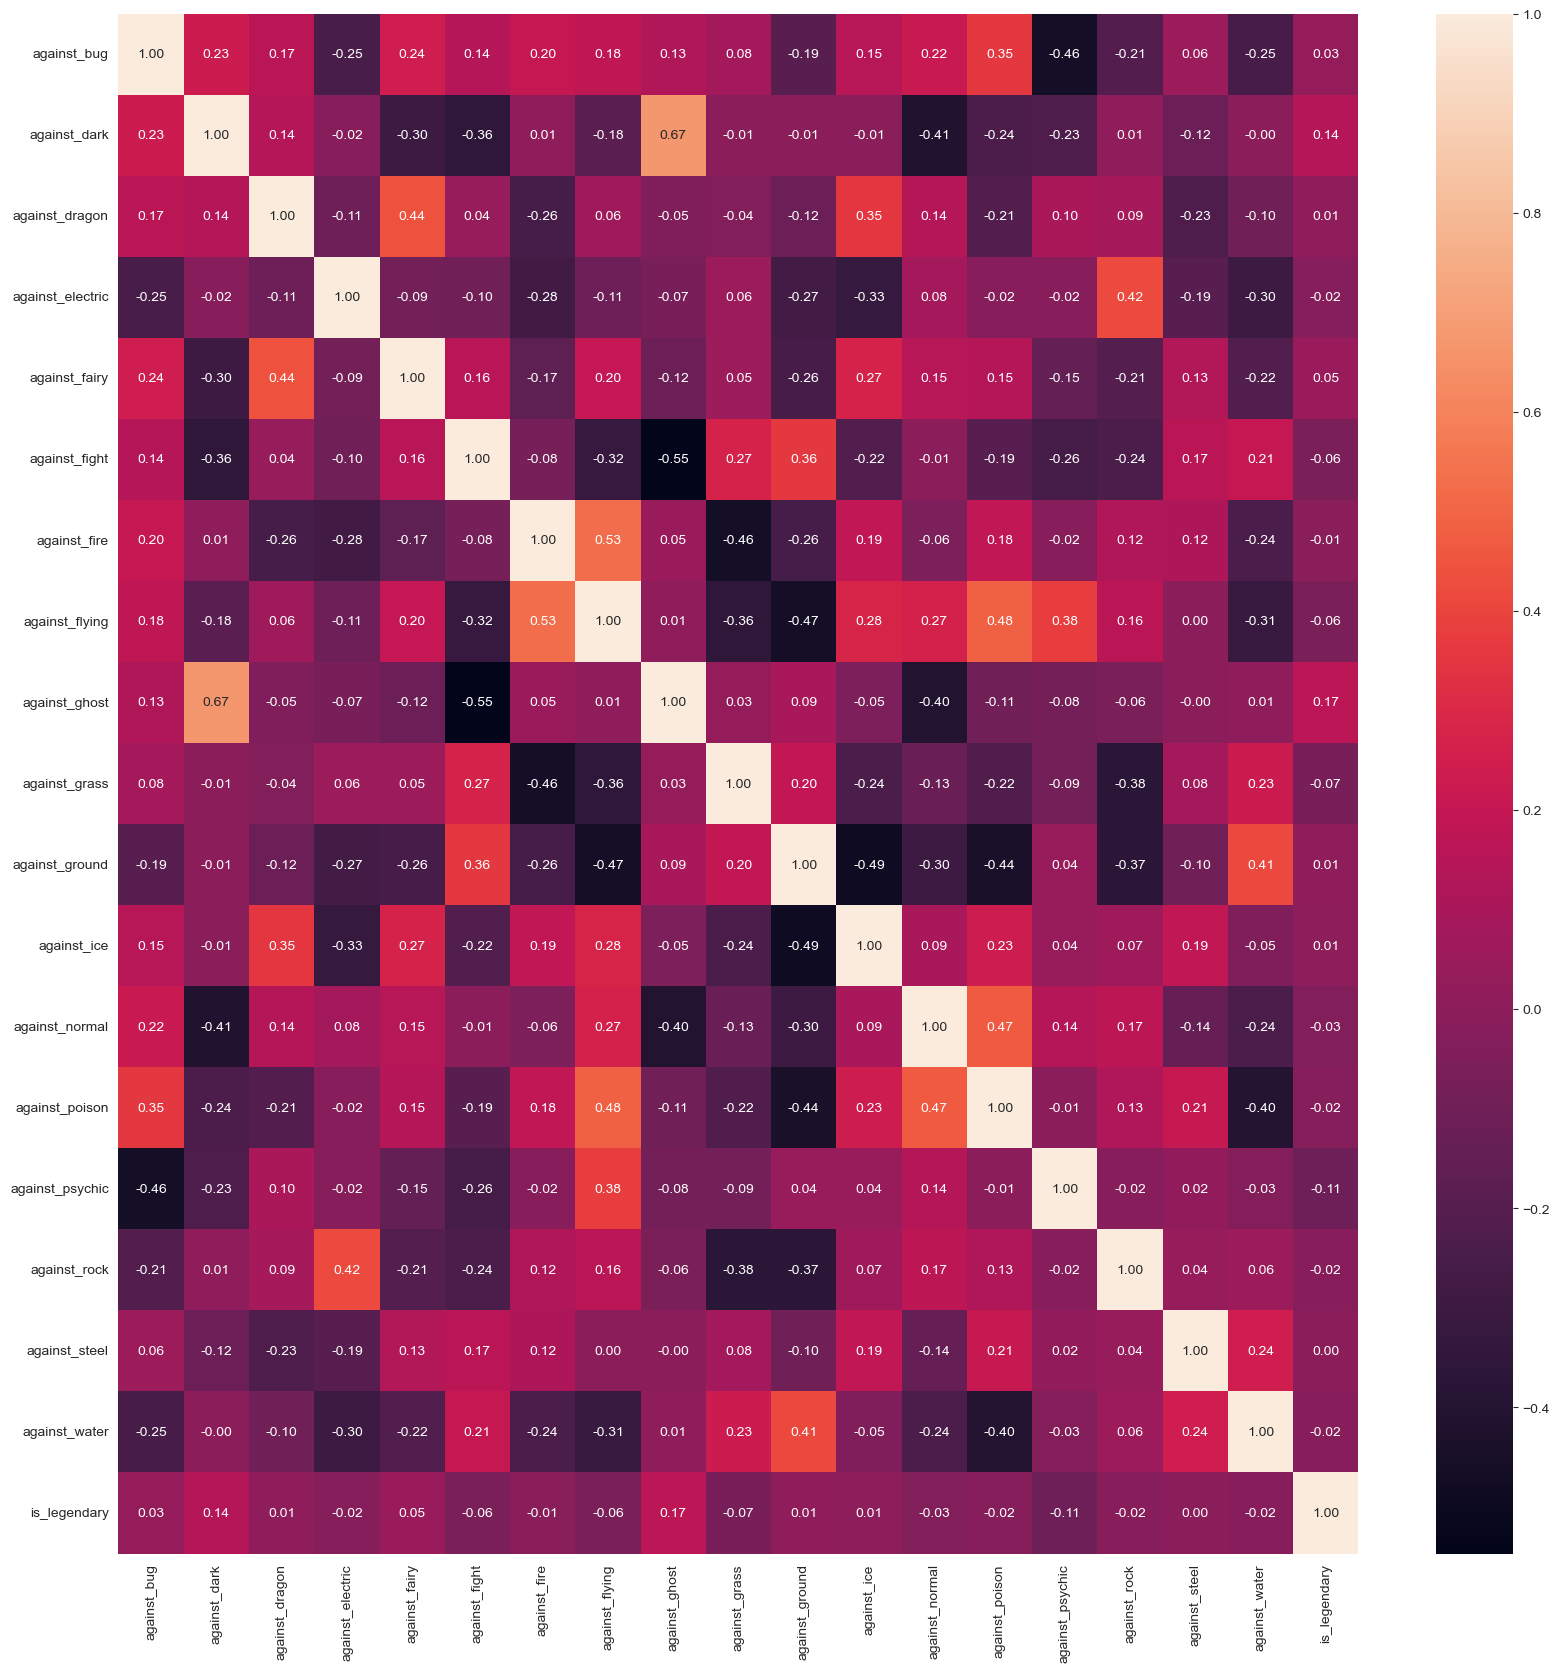

In [113]:
# Crea el mapa de calor con los índices de correlación


_Incluye aquí tus observaciones._

**En base en a lo analizado hasta ahora, quédate con las columnas que consideres más informativas a efectos predictivos.**

In [115]:
data_f = data[['attack', 'base_egg_steps', 'base_happiness', 'base_total',
               'capture_rate', 'defense', 'experience_growth', 'height_m',
               'hp', 'percentage_male', 'sp_attack', 'sp_defense', 'speed',
               'weight_kg', 'n_abilities', 'is_legendary']]

**¿Por qué crees que no debemos usar variables como `name`, `japanese_name` o `pokedex_number`?**

_Incluye aquí tus observaciones._

**Crea un mapa de calor que muestre cómo se correlacionan las características seleccionadas y la variable a predecir, ¿qué observas?**

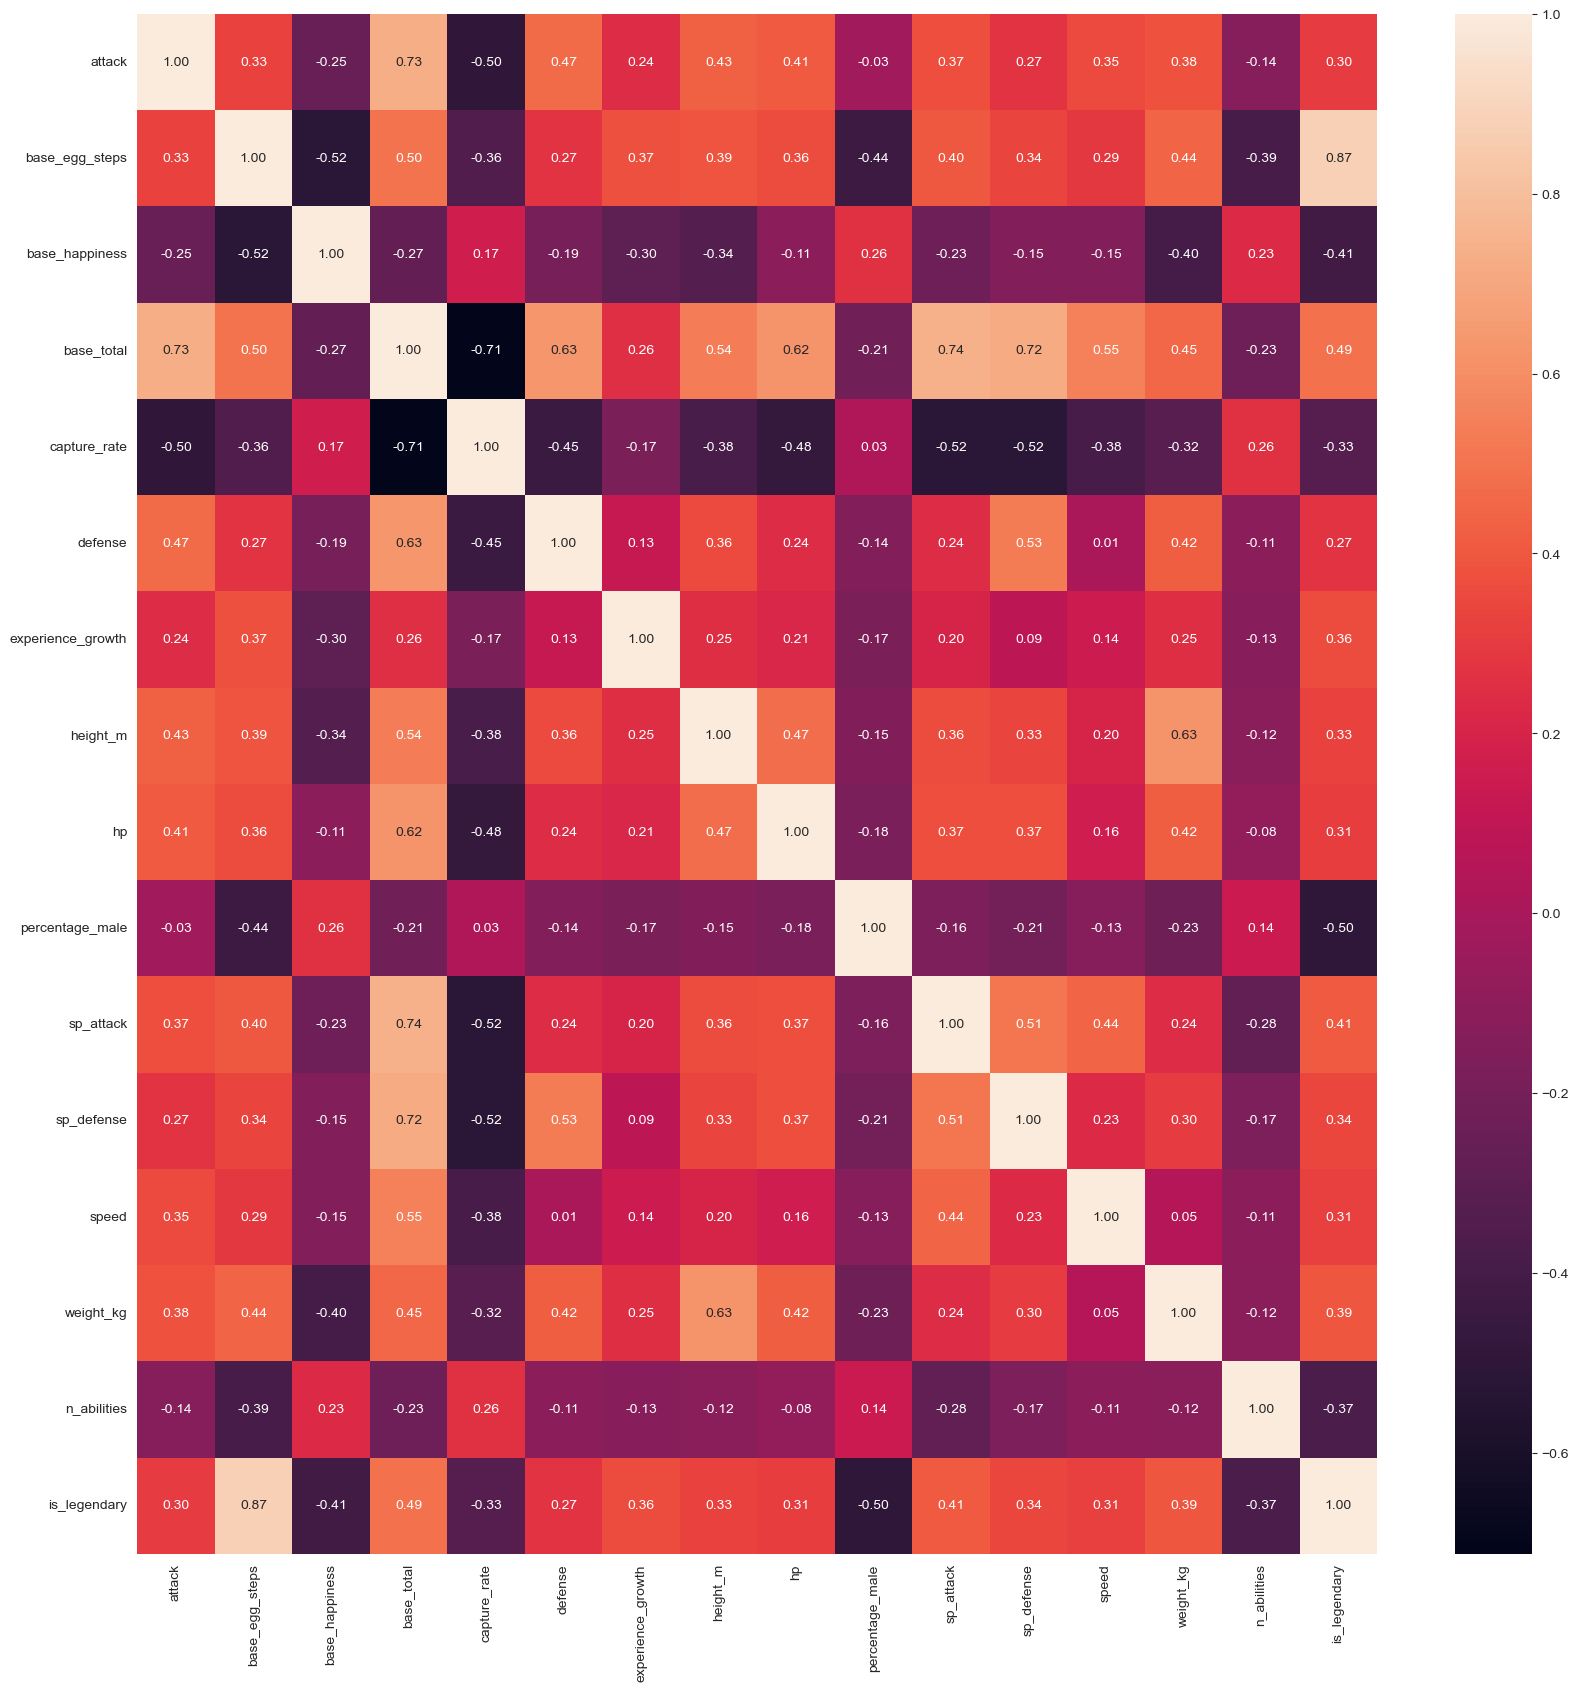

_Incluye aquí tus observaciones._

**Ahora que hemos seleccionado las características definitivas con las que vamos a entrenar nuestro modelo usan un _pair plot_ para mostrar su distribución en base a la variable de salida. Guarda la imagen en forma de PNG para poder visualizarla mejor.**

Un _pair plot_ muestra la relación bivariada entre cada par de características, es decir, crea gráficos con todas las combinaciones posibles de columnas numéricas.

In [117]:
data_f = data_f[['base_egg_steps', 'base_happiness', 'base_total',
                 'capture_rate', 'experience_growth', 'height_m',
                 'percentage_male', 'weight_kg', 'n_abilities',
                 'is_legendary']]

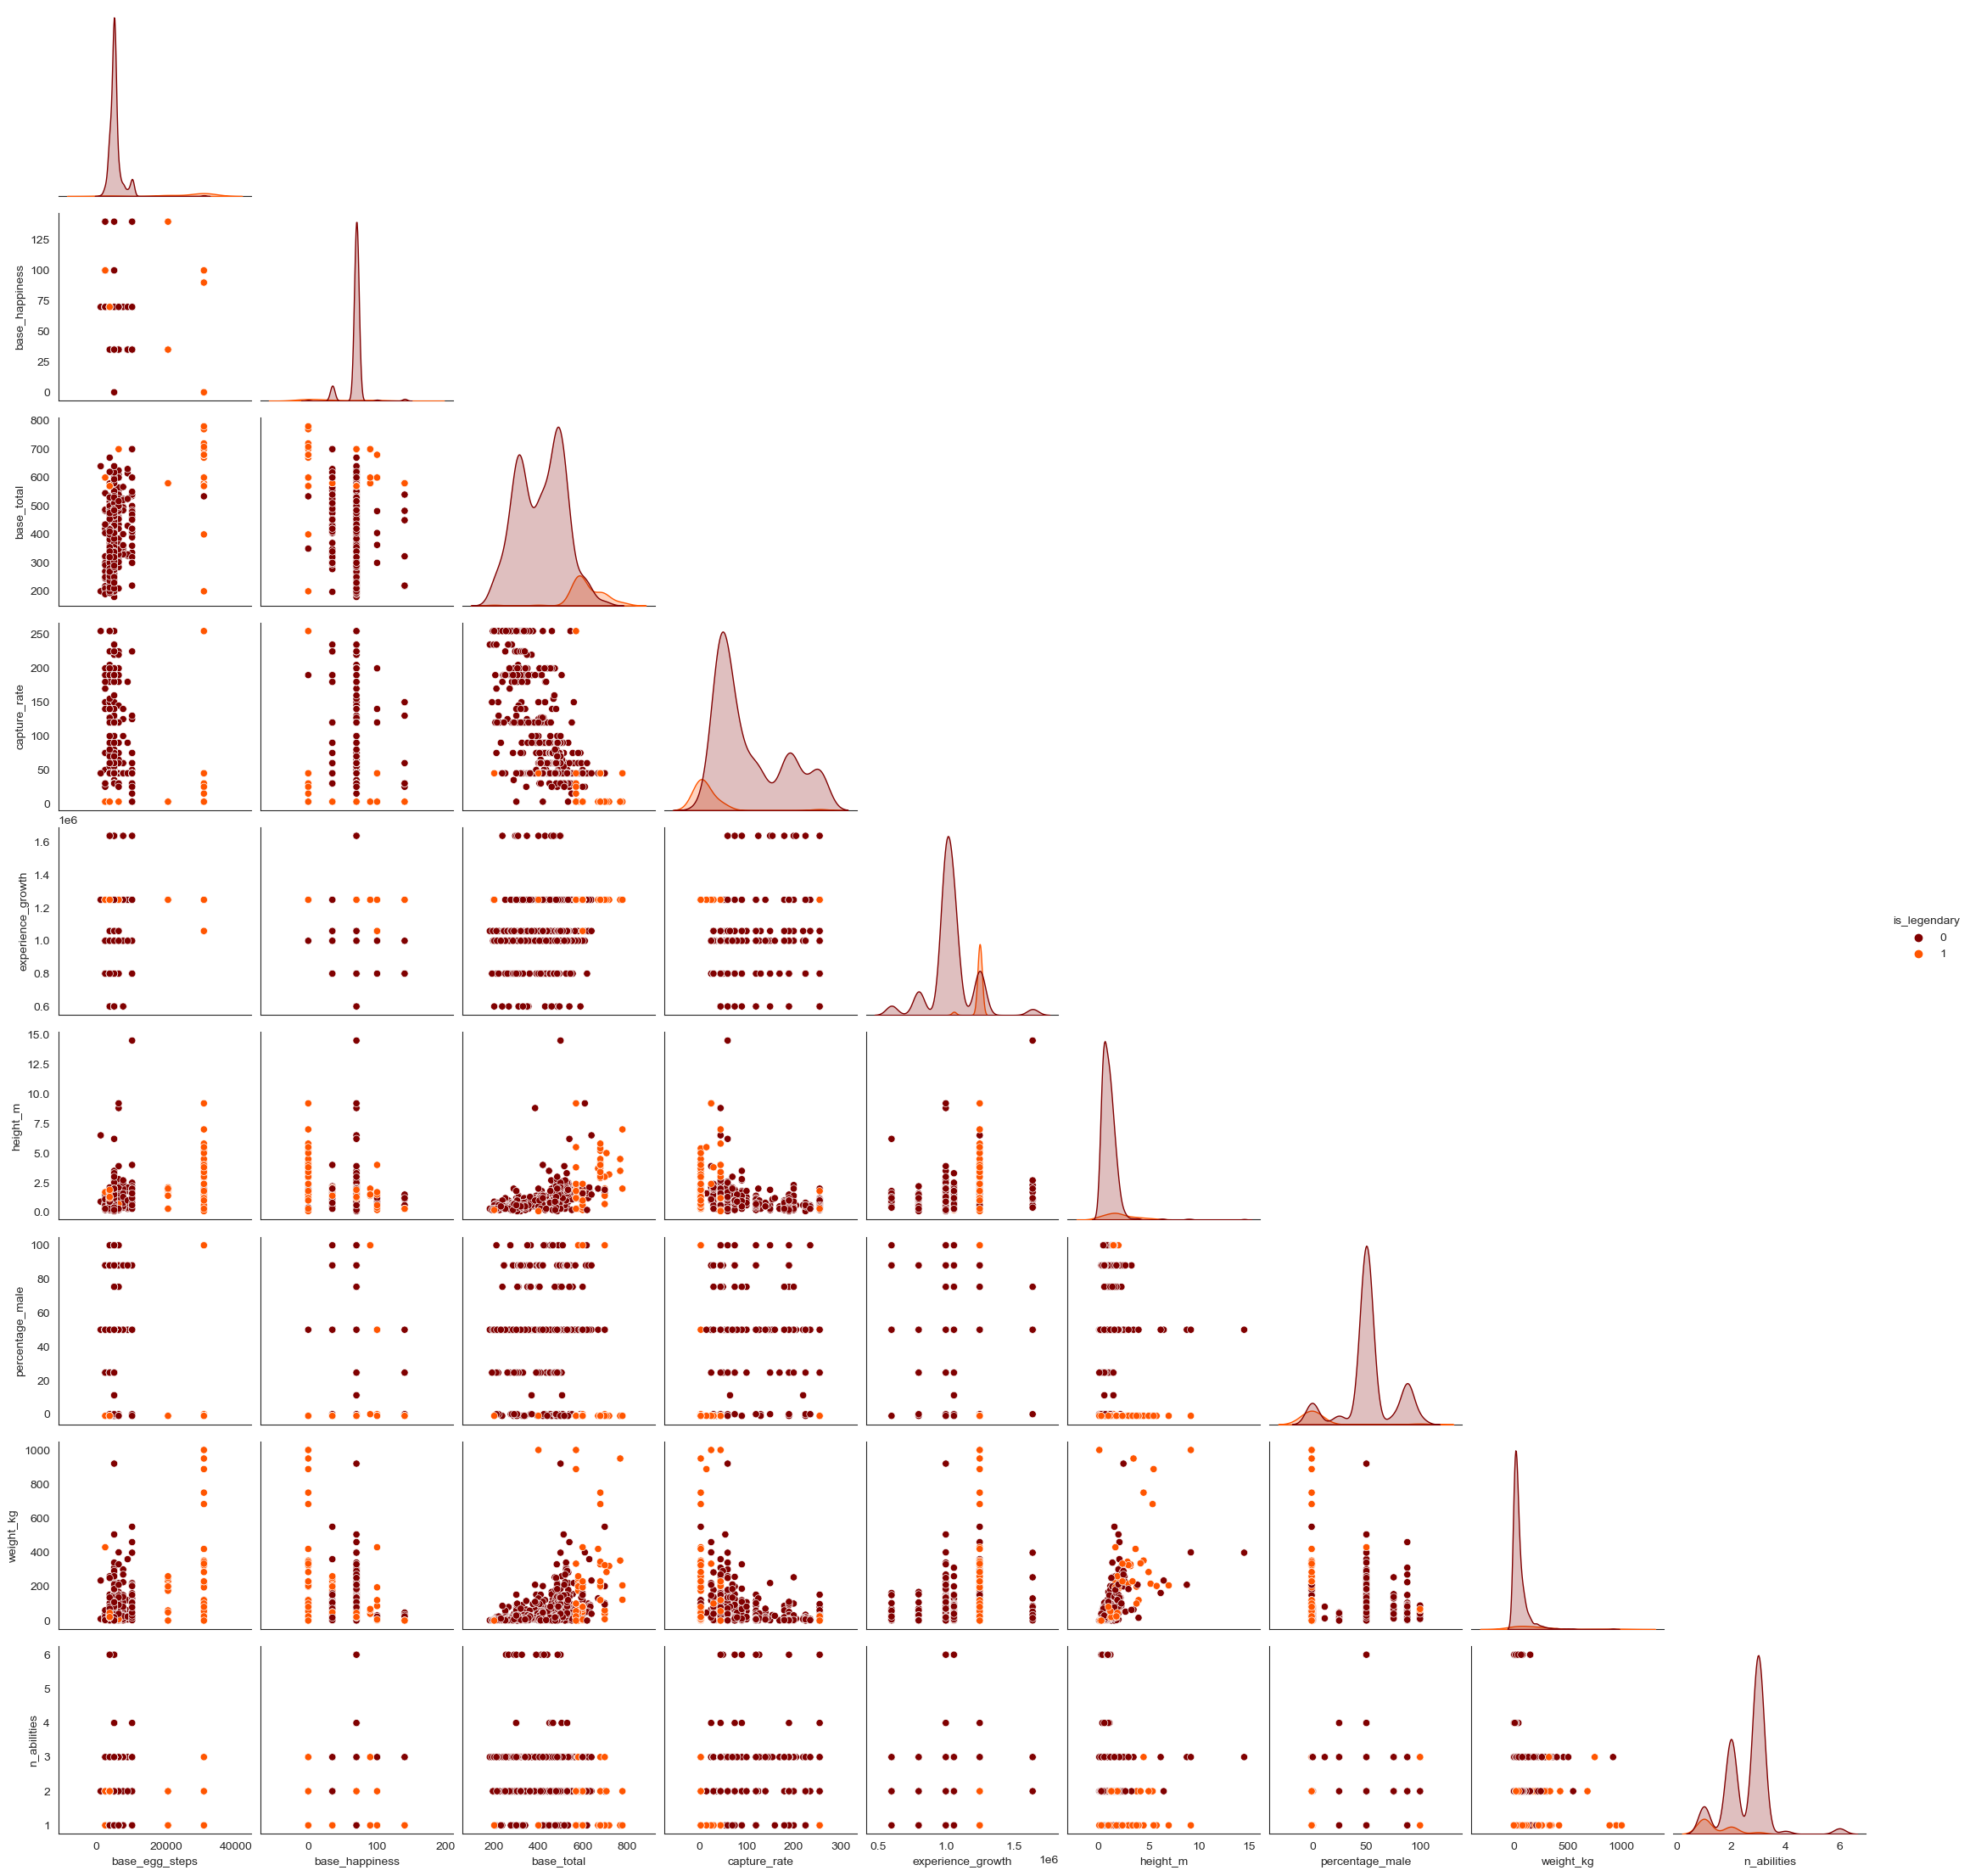

In [118]:
# Creamos el pair plot


## 4. División conjuntos de entrenamiento y prueba

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

**Divide el dataset en los conjuntos de entrenamiento y prueba usando la función `train_test_split()` de la librería Scikit-Learn en una proporción de 70/30. Usa un `random_state=0` y estratifica en base a `y`.**

Para más información sobre la división de los datos consulta ["The Importance of Data Splitting"](https://mlu-explain.github.io/train-test-validation/).

## 5. Entrenar y evaluar el clasificador

**Escala los datos usando la clase `MinMaxScaler()` de la librería Scikit-Learn.**

En la práctica, a menudo encontramos diferentes tipos de variables en el mismo conjunto de datos. Un problema importante derivado de esto es que el rango de las variables puede diferir mucho, de modo que en determinados algoritmos el uso de la escala original de las variables puede poner más peso en aquellas con un rango grande.

Aunque la regresión logística en principio no requiere de este escalado, sí que es recomendable hacerlo ya que va a ayudar al algoritmo a converger antes.

Vamos a usar el algoritmo `MinMaxScaler()` que lo que va a hacer el poner el valor más alto de cada variables a 1 y el más pequeño a 0 y ajustar el resto de valores que toma esa variable entre estos dos valores. 

Para más información sobre el escalado de variables: [Standardization vs. Normalization: What’s the Difference?](https://www.statology.org/standardization-vs-normalization/).

In [123]:
# Instancia el escalador 

# Escala los datos


array([[0.09090909, 0.5       , 0.375     , ..., 0.5049505 , 0.00410082,
        0.2       ],
       [0.13636364, 0.5       , 0.275     , ..., 0.5049505 , 0.06491298,
        0.4       ],
       [0.09090909, 0.5       , 0.26833333, ..., 0.5049505 , 0.00340068,
        0.2       ],
       ...,
       [0.        , 0.5       , 0.15      , ..., 0.25346535, 0.00540108,
        0.4       ],
       [0.04545455, 0.5       , 0.14333333, ..., 0.5049505 , 0.00540108,
        0.2       ],
       [0.09090909, 0.5       , 0.5       , ..., 0.5049505 , 0.02840568,
        0.4       ]])

In [125]:
# Recrea el dataset de entrenamiento con las columnas estandarizadas


base_egg_steps  base_happiness  base_total  capture_rate  \
0        0.090909            0.50    0.375000      0.781746   
1        0.136364            0.50    0.275000      0.087302   
2        0.090909            0.50    0.268333      0.781746   
3        0.227273            0.25    0.575000      0.166667   
4        0.272727            0.25    0.866667      0.000000   

   experience_growth  height_m  percentage_male  weight_kg  n_abilities  
0           0.384615  0.020833         0.504950   0.004101          0.2  
1           0.625000  0.062500         0.504950   0.064913          0.4  
2           0.384615  0.020833         0.504950   0.003401          0.2  
3           0.384615  0.048611         0.882178   0.025805          0.2  
4           0.625000  0.104167         0.000000   0.550010          0.2

In [126]:
# Escala el conjunto de prueba


In [127]:
# Recrea el dataset de prueba con las columnas estandarizadas


base_egg_steps  base_happiness  base_total  capture_rate  \
0        0.090909             0.5    0.233333      1.000000   
1        0.090909             0.5    0.575000      0.166667   
2        0.090909             0.5    0.463333      0.345238   
3        0.090909             0.5    0.116667      0.742063   
4        0.045455             0.5    0.466667      0.345238   

   experience_growth  height_m  percentage_male  weight_kg  n_abilities  
0           0.442173  0.027778         0.504950   0.005301          0.2  
1           0.442173  0.118056         0.882178   0.100420          0.2  
2           1.000000  0.180556         0.504950   0.052410          0.2  
3           0.384615  0.041667         0.504950   0.034907          0.4  
4           1.000000  0.076389         0.504950   0.039108          0.4

Para más información sobre `MinMaxScaler()`: [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

**Entrena y evalúa un clasificador de regresión logística.**

In [128]:
# Instancia el clasificador

# Entrena el clasificador


LogisticRegression(random_state=42)

In [129]:
# Imprime la exactitud en los set de entrenamiento y prueba


Accuracy of LR on training set: 0.99
Accuracy of LR on test set: 0.98


In [130]:
# Realiza las predicciones


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

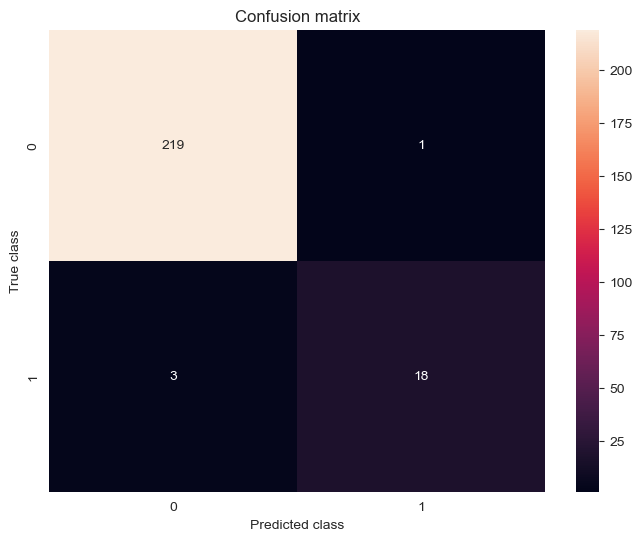

In [131]:
# Calcula la matriz de confusión


In [133]:
# Imprime el informe de clasificación


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       220
           1       0.95      0.86      0.90        21

    accuracy                           0.98       241
   macro avg       0.97      0.93      0.95       241
weighted avg       0.98      0.98      0.98       241



**¿Cómo interpretas estas métricas?**

_Incluye aquí tus observaciones._

## 6. Predecir nuevos Pokémons

Hemos entrenado nuestro modelo usando Pokémon de las 7 primeras generaciones, pero ya existen Pokémon de octava generación. Vamos a ver si nuestro modelo es capaz de predecir si los Pokémon de esta nueva generación son legendarios o no.

**Preprocesa las características de entrada de los Pokémon que quieres clasificar. Te doy dos de muestra cuya información se ha extraído de la misma web de la que se hizo el _web scraping_ de los datos con los que hemos estado trabajando:**
* _**Urshifu**_ es un Pokémon legendario de 8ª generación ([Ficha](https://www.serebii.net/pokedex-swsh/urshifu/)).
* _**Rookidee**_ es un Pokémon no legendario de 8ª generación ([Ficha](https://www.serebii.net/pokedex-swsh/rookidee/)).

In [134]:
new_data = {'name': ['Urshifu', 'Rookidee'],
            'base_egg_steps': [30720, 3840],
            'base_happiness': [50, 50],
            'base_total': [550, 245],
            'capture_rate': [3, 255],
            'experience_growth': [1250000, 1059862],
            'height_m': [1.9, 0.2],
            'percentage_male': [88.14, 50.2],
            'weight_kg': [110, 1.8],
            'n_abilities': [1, 3]}

In [136]:
# Crea un DataFrame con los nuevos datos

# Establece 'name' como índice


base_egg_steps  base_happiness  base_total  capture_rate  \
name                                                                 
Urshifu            30720              50         550             3   
Rookidee            3840              50         245           255   

          experience_growth  height_m  percentage_male  weight_kg  n_abilities  
name                                                                            
Urshifu             1250000       1.9            88.14      110.0            1  
Rookidee            1059862       0.2            50.20        1.8            3

In [140]:
# Escala los datos


In [141]:
# Recrea el dataset de prueba con las columnas estandarizadas


base_egg_steps  base_happiness  base_total  capture_rate  \
name                                                                 
Urshifu         1.000000        0.357143    0.616667           0.0   
Rookidee        0.045455        0.357143    0.108333           1.0   

          experience_growth  height_m  percentage_male  weight_kg  n_abilities  
name                                                                            
Urshifu            0.625000  0.125000         0.882574   0.109922          0.0  
Rookidee           0.442175  0.006944         0.506931   0.001700          0.4

**Realiza las predicciones usando el modelo que hemos entrenado.**

In [144]:
leyenda = {0: 'NO LEGENDARIO',
           1: 'LEGENDARIO'}

array([[0.42599979, 0.57400021],
       [0.99822373, 0.00177627]])

In [145]:
# Haz las predicciones

# Imprime los resultados


Urshifu es un Pokémon LEGENDARIO.
Rookidee es un Pokémon NO LEGENDARIO.
